In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train, test], ignore_index=True, sort = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Check unique values

In [5]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

**<font size = 4><u>Conclusion:</u></font>** there are some duplicates in Name column

## Сheck the data for duplicates

In [6]:
df[df['Name'].duplicated()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [7]:
df[df['Name']=='Kelly, Mr. James']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [8]:
df[df['Name']=='Connolly, Miss. Kate']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


**<font size = 4><u>Conclusion:</u></font>** These are diffrent people

## Check null data

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**<font size = 4><u>Conclusion:</u></font>**

Survived        418 - the values of the target variable that we need to predict


<u>All others need to be investigated:</u>\
Age             263\
Fare              1\
Cabin          1014\
Embarked          2

## Target variable analysis

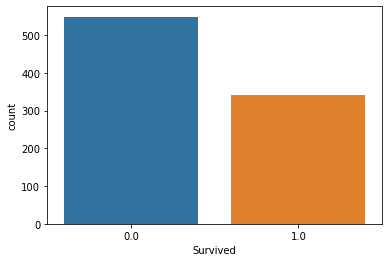

In [10]:
sns.countplot(data=df, x = 'Survived');

In [11]:
print('The percentage of the target variable is:')
df['Survived'].value_counts(normalize=True, ascending=True)*100

The percentage of the target variable is:


1.0    38.383838
0.0    61.616162
Name: Survived, dtype: float64

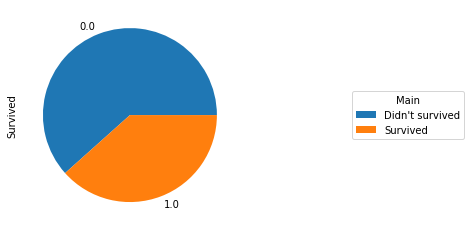

In [12]:
fig_pclass = df['Survived'].value_counts().plot.pie().legend(labels=["Didn't survived","Survived"], 
                            loc='center left', bbox_to_anchor=(1.5, 0.5)).set_title("Main");

## Let's start working with missing data
### Fare column

In [13]:
df[df['Fare'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### Let's see if there are zero values

In [14]:
# Checking for implicit missing data
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [15]:
len(df[df['Fare'] == 0])

17

**<font size = 4><u>Conclusion:</u></font>** The ticket price cannot be zero. Therefore, fill in these lines with the average ticket price depending on the passenger class

In [16]:
# replace the 0 value with np.NaN for further work
df.loc[df['Fare'] == 0, 'Fare'] = np.NaN

In [17]:
len(df[df['Fare'].isnull() == True])

18

In [18]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    89.447482
2    21.648108
3    13.378473
Name: Fare, dtype: float64

In [19]:
null_fare = df[df['Fare'].isnull() == True]

In [20]:
null_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,NaN,NaN,S


### Fill the Fare column with mean values by Pclass column 

In [21]:
df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('mean'))

In [22]:
# check
df[df['Fare'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
# check
null_fare = null_fare.copy()
null_fare.loc[:, 'Fare'] = df.loc[null_fare.index, 'Fare']

In [24]:
# check the filling
pd.merge(null_fare.groupby('Pclass', as_index=False)['Fare'].count(),
         null_fare.groupby('Pclass', as_index=False)['Fare'].mean(),
         how='inner',on='Pclass',suffixes=('_count','_avg'))

,Pclass,Fare_count,Fare_avg
0,1,7,89.447482
1,2,6,21.648108
2,3,5,13.378473


### Work with 'Embarked' column 

In [25]:
df[df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
null_emb = df[df['Embarked'].isnull() == True]

In [27]:
null_emb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
df[df['Pclass']==1]['Embarked'].value_counts(normalize=True)

S    0.551402
C    0.439252
Q    0.009346
Name: Embarked, dtype: float64

In [29]:
df[df['Pclass']==1]['Embarked'].value_counts()

S    177
C    141
Q      3
Name: Embarked, dtype: int64

### Fill the Embarked column with modal values for this column by passenger class. We use the 1st class of passengers, since the passengers under study belong to this class

In [30]:
df['Embarked'] = df['Embarked'].fillna(df[df['Pclass']==1]['Embarked'].mode()[0])

In [31]:
null_emb = null_emb.copy()
null_emb.loc[:, 'Embarked'] = df.loc[null_emb.index, 'Embarked']

In [32]:
# check the filling
null_emb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### Work with 'Cabin' column 

In [39]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [37]:
df['Cabin_len'] =  df['Cabin'].str.len()

In [104]:
df['Ticket_len'] =  df['Ticket'].str.len()

In [112]:
df['Ticket_is_Al'] =  df['Ticket'].str.contains(r'[A-Za-z]')

In [113]:
df['Ticket_is_Al'].value_counts()

False    957
True     352
Name: Ticket_is_Al, dtype: int64

In [117]:
df1 = df[df['Survived'].isnull()==False].copy()

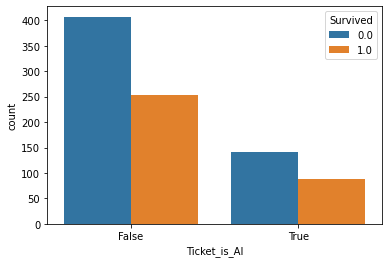

In [118]:
sns.countplot(data=df1, x = 'Ticket_is_Al', hue='Survived');

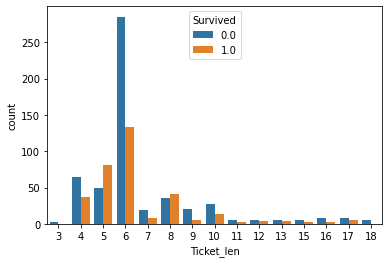

In [120]:
sns.countplot(data=df1, x = 'Ticket_len', hue='Survived');

In [119]:
df[df['Ticket_is_Al']==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_len,Ticket_len,Ticket_is_Al
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,9,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,8,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,16,True
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2.0,7,True
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,NaN,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,3.0,13,True
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,18,True
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,9,True
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4.0,8,True


In [102]:
df['Ticket_len'].value_counts()

6     602
5     193
4     148
8     118
10     63
9      37
7      36
13     19
11     18
12     16
17     16
18     14
16     13
15     12
3       4
Name: Ticket_len, dtype: int64

In [121]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_len,Ticket_len,Ticket_is_Al
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.033807,0.068730,-0.001623,-0.003538
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.246542,-0.015077,-0.055331,-0.001492
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.572581,-0.095449,0.052650,-0.088045
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.182525,-0.016373,-0.049922,0.025664
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.154514,0.350730,-0.016514,0.078437
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.216161,0.493794,0.003029,0.084573
Fare,0.033807,0.246542,-0.572581,0.182525,0.154514,0.216161,1.000000,0.585315,-0.021683,0.169264
Cabin_len,0.068730,-0.015077,-0.095449,-0.016373,0.350730,0.493794,0.585315,1.000000,0.042597,0.156875
Ticket_len,-0.001623,-0.055331,0.052650,-0.049922,-0.016514,0.003029,-0.021683,0.042597,1.000000,0.765292
Ticket_is_Al,-0.003538,-0.001492,-0.088045,0.025664,0.078437,0.084573,0.169264,0.156875,0.765292,1.000000


In [41]:
df['Cabin_len'].value_counts()

3.0     184
4.0      32
2.0      32
7.0      19
11.0     10
5.0       7
1.0       6
15.0      5
Name: Cabin_len, dtype: int64

In [174]:
df[df['Cabin_len'] == 11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_len,Ticket_len,Ticket_is_Al
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000000,C23 C25 C27,S,11.0,5,False
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000000,C23 C25 C27,S,11.0,5,False
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000000,C23 C25 C27,S,11.0,5,False
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000000,C23 C25 C27,S,11.0,5,False
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.329200,B51 B53 B55,C,11.0,8,True
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.000000,B51 B53 B55,S,11.0,3,False
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.000000,C23 C25 C27,S,11.0,5,False
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.000000,C23 C25 C27,S,11.0,5,False
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.329200,B51 B53 B55,C,11.0,8,True
1263,1264,NaN,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,89.447482,B52 B54 B56,S,11.0,6,False


In [72]:
df[df['Fare'].between(30,40)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_len
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,NaN
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,2.0
25,26,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,NaN
50,51,0.0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1230,NaN,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN
1252,1253,NaN,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,NaN
1258,1259,NaN,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S,NaN
1270,1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S,NaN


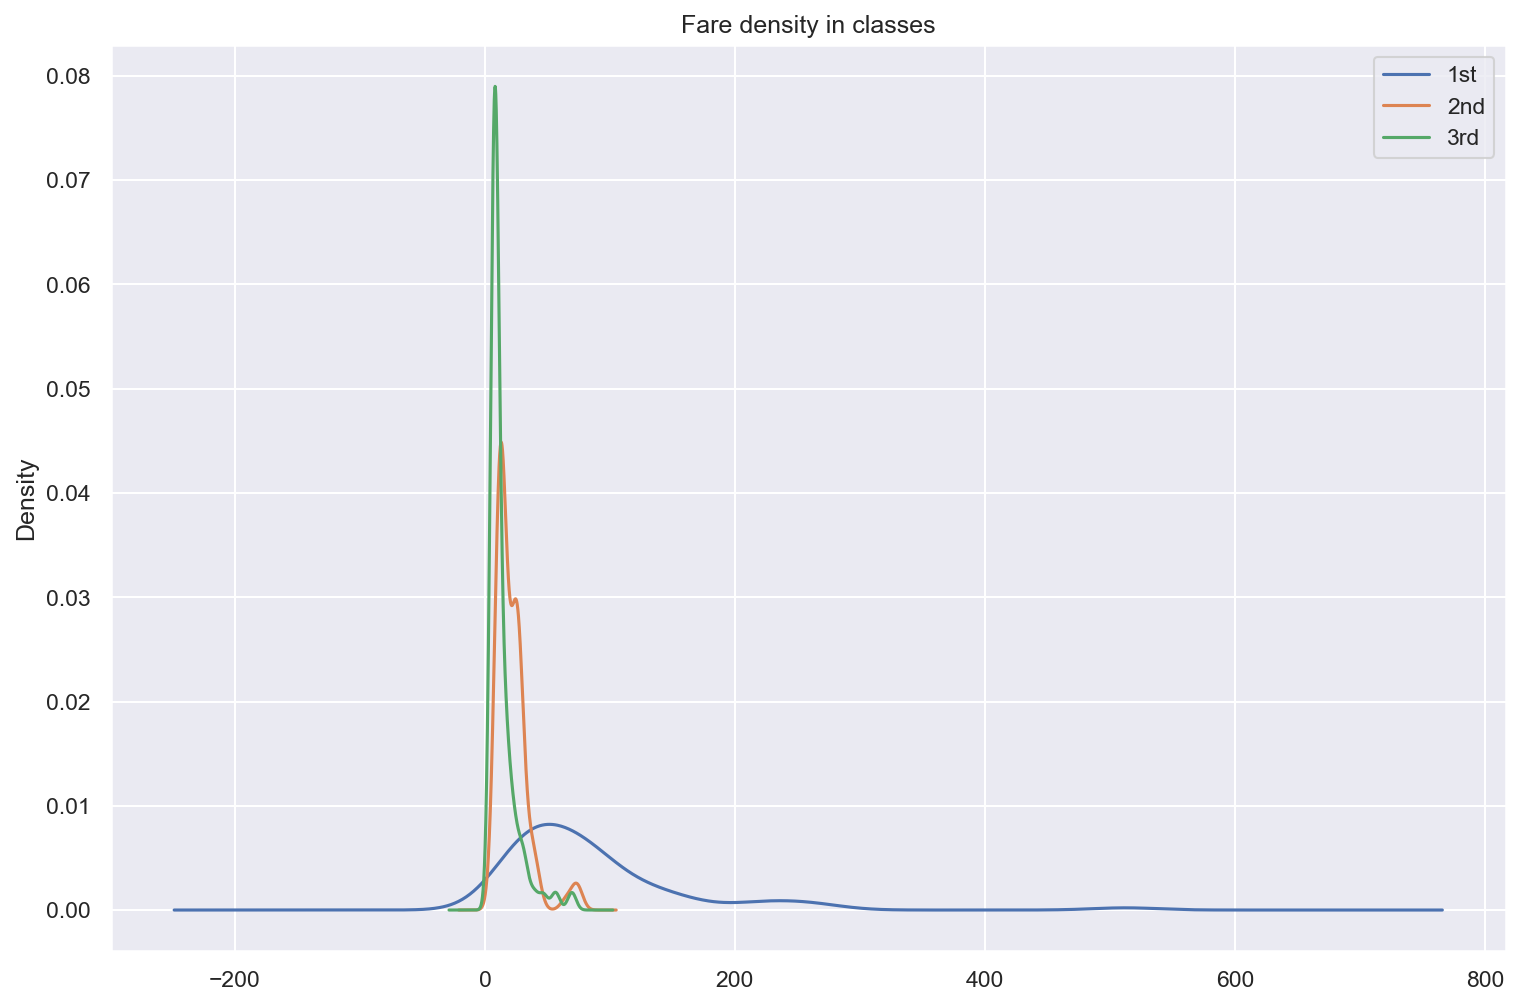

In [167]:
plt.figure(figsize=(12,8),dpi=150)
for i in range(1,4):
    df1['Fare'][df1['Pclass'] == i].plot(kind="kde")
plt.title("Fare density in classes")
plt.legend(('1st','2nd', '3rd'));

In [181]:
df2.groupby('Pclass')['Fare'].describe().transpose()

Pclass,1,2,3
count,215.000000,184.000000,491.000000
mean,86.603023,21.368100,13.784540
std,77.279217,12.867006,11.712674
min,25.587500,10.500000,4.012500
25%,34.337500,13.000000,7.750000
50%,66.600000,15.875000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


In [175]:
df2=df1.drop(872, axis=0)

In [180]:
df.groupby('Pclass')['Fare'].min()

Pclass
1    5.0000
2    9.6875
3    3.1708
Name: Fare, dtype: float64

In [170]:
df[(df['Fare'].between(5,25)) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_len,Ticket_len,Ticket_is_Al
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,11.0,3,False


In [90]:
df[(df['Fare'].between(4,26)) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_len
168,169,0.0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN
284,285,0.0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,3.0
545,546,0.0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S,NaN
662,663,0.0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S,3.0
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,3.0
862,863,1.0,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,3.0
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,11.0
902,903,NaN,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S,NaN
968,969,NaN,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,4.0
973,974,NaN,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S,NaN


In [60]:
df['Cabin'].nunique()

186

In [61]:
df[df['Cabin'].notnull() == True][['Pclass', 'Cabin']].groupby('Pclass')['Cabin'].count()

Pclass
1    256
2     23
3     16
Name: Cabin, dtype: int64

In [62]:
len(df[df['Cabin_len'].notnull() == True])

295

### Conclusion:
#### We can't use the data from this column for further research, so I consider it necessary to delete it

In [41]:
df = df.drop('Cabin', axis=1)

## Creating column with the form of addressing a person

In [42]:
df['aux_name'] = df.Name.apply(lambda x: x.split(', ')[1].split('.')[0])

In [43]:
df['aux_name'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: aux_name, dtype: int64

In [44]:
df['aux_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [45]:
other_names = df[df['aux_name'].isin(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir',
                                    'Mlle', 'Col', 'Capt', 'the Countess','Jonkheer', 'Dona']) == True]

In [46]:
other_names.sort_values('aux_name')[['aux_name', 'Sex', 'Age']]

,aux_name,Sex,Age
745,Capt,male,70.0
647,Col,male,56.0
1093,Col,male,47.0
1022,Col,male,53.0
694,Col,male,60.0
30,Don,male,40.0
1305,Dona,female,39.0
398,Dr,male,23.0
796,Dr,female,49.0
766,Dr,male,NaN


### Conclusion:
#### Based on the sorted data, replace the forms for contacting passengers, except for Dr, because out of 8 doctors, 7 are men and one is a woman

In [47]:
df['aux_name'] = df['aux_name'].map({'Capt': 'Mr', 'Col': 'Mr', 'Don': 'Mr', 'Dona': 'Mrs','Jonkheer':'Mr',
                                     'Lady':'Mrs', 'Major': 'Mr', 'Mlle': 'Miss', 'Mme': 'Mrs','Ms': 'Miss',
                                     'Rev': 'Mr', 'Sir': 'Mr', 'Dr': 'Mr', 'the Countess': 'Mrs', 
                                     'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master','Dr': 'Dr'})

In [48]:
# make a replacement for female Dr
ind_dr_fem = other_names[(other_names['aux_name']=='Dr') & (other_names['Sex']=='female')].index

In [49]:
df.loc[ind_dr_fem, 'aux_name'] = 'Mrs'

In [50]:
# make a replacement for female Dr
ind_dr_male = other_names[(other_names['aux_name']=='Dr') & (other_names['Sex']=='male')].index

In [51]:
df.loc[ind_dr_male, 'aux_name'] = 'Mr'

In [52]:
# check the filling
other_names = other_names.copy()
other_names.loc[:, 'aux_name'] = df.loc[other_names.index, 'aux_name']

In [53]:
other_names['aux_name'].value_counts()

Mr      25
Mrs      5
Miss     4
Name: aux_name, dtype: int64

In [54]:
# check the filling
other_names.groupby(['aux_name', 'Sex','Age']).count()['PassengerId']

aux_name  Sex     Age 
Miss      female  24.0    2
                  28.0    1
Mr        male    23.0    1
                  27.0    1
                  28.0    1
                  30.0    1
                  32.0    1
                  38.0    1
                  40.0    1
                  41.0    1
                  42.0    1
                  44.0    1
                  45.0    1
                  47.0    1
                  49.0    1
                  50.0    1
                  51.0    1
                  52.0    1
                  53.0    2
                  54.0    2
                  56.0    1
                  57.0    1
                  60.0    1
                  70.0    1
Mrs       female  24.0    1
                  33.0    1
                  39.0    1
                  48.0    1
                  49.0    1
Name: PassengerId, dtype: int64

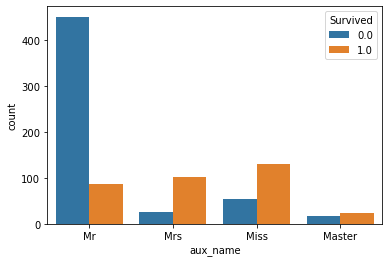

In [55]:
sns.countplot(data=df, x = 'aux_name', hue='Survived');

In [56]:
df.groupby(['aux_name', 'Survived']).count()['PassengerId']

aux_name  Survived
Master    0.0          17
          1.0          23
Miss      0.0          55
          1.0         130
Mr        0.0         451
          1.0          86
Mrs       0.0          26
          1.0         103
Name: PassengerId, dtype: int64

In [57]:
uniq_aux_name = list(df['aux_name'].unique())

In [58]:
for name in uniq_aux_name:
    print('Total {}\'s are {}, survival rate:'.format(name, len(df[(df['aux_name']==name)  & (df['Survived'].notnull() == True)])))
    print(df[df['aux_name'] == name]['Survived'].value_counts(normalize=True)*100)

Total Mr's are 537, survival rate:
0.0    83.985102
1.0    16.014898
Name: Survived, dtype: float64
Total Mrs's are 129, survival rate:
1.0    79.844961
0.0    20.155039
Name: Survived, dtype: float64
Total Miss's are 185, survival rate:
1.0    70.27027
0.0    29.72973
Name: Survived, dtype: float64
Total Master's are 40, survival rate:
1.0    57.5
0.0    42.5
Name: Survived, dtype: float64


In [59]:
sur_tot_df = pd.DataFrame({
    "Survived":
    df[df['Survived'] == 1.0]['aux_name'].value_counts(),
    "Total":
    df[df['Survived'].notnull()==True]['aux_name'].value_counts()
})

In [60]:
sur_tot_df

,Survived,Total
Master,23,40
Miss,130,185
Mr,86,537
Mrs,103,129


<AxesSubplot:>

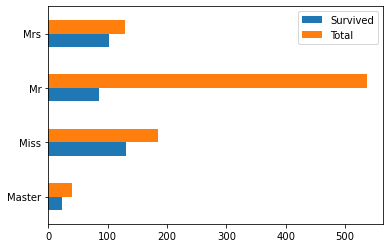

In [61]:
sur_tot_df.plot.barh()

## One of the main conclusions
#### The percentage of surviving women is many times higher than that of men

### Work with missing data in the Age column

In [62]:
null_age = df[df['Age'].isnull() == True]

In [63]:
null_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,aux_name
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q,Miss
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q,Miss
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,Mr


In [64]:
df.groupby(['aux_name','Pclass'])['Age'].describe()

count       mean        std    min     25%   50%    75%   max
aux_name Pclass                                                               
Master   1         5.0   6.984000   4.974061   0.92   4.000   6.0  11.00  13.0
         2        11.0   2.757273   2.723942   0.67   0.915   2.0   3.00   8.0
         3        37.0   6.090000   4.152566   0.33   2.000   6.0   9.00  14.5
Miss     1        61.0  30.131148  11.528914   2.00  22.000  30.0  36.00  63.0
         2        49.0  20.865714  12.124848   0.92  12.000  20.0  28.00  50.0
         3       103.0  17.360874   9.935434   0.17   9.000  18.0  23.00  45.0
Mr       1       146.0  42.195205  13.335766  17.00  31.000  42.0  50.75  80.0
         2       147.0  32.914966  12.075869  14.00  24.000  30.0  39.50  70.0
         3       312.0  28.318910   9.907858  11.00  21.000  26.0  33.00  74.0
Mrs      1        72.0  42.888889  13.809117  17.00  35.000  45.0  53.00  76.0
         2        54.0  33.518519  10.493018  14.00  25.250  30.5  40.75  60.0
         3        49.0  32.326531  10.194745  15.00  26.000  31.0  39.00  63.0

### Conclusion:
#### There is no clear 100% correct solution when replacing null values in the Age column, so I will proceed from the following logic: I will replace the missing values with the average age in the columns of the form of address to the person and the passenger class

In [65]:
df['Age'] = df['Age'].fillna(df.groupby(['aux_name','Pclass'])['Age'].transform('mean'))

In [66]:
# check the filling
df[df['Age'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,aux_name


In [67]:
# check the filling
null_age = null_age.copy()
null_age.loc[:, 'Age'] = df.loc[null_age.index, 'Age']

In [68]:
null_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,aux_name
5,6,0.0,3,"Moran, Mr. James",male,28.318910,0,0,330877,8.4583,Q,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,32.914966,0,0,244373,13.0000,S,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,32.326531,0,0,2649,7.2250,C,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,28.318910,0,0,2631,7.2250,C,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,17.360874,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,17.360874,0,0,334915,7.7208,Q,Miss
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,17.360874,0,0,365237,7.7500,Q,Miss
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.318910,0,0,A.5. 3236,8.0500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.318910,0,0,359309,8.0500,S,Mr


## Create a column with age categories

In [69]:
df['Age'].describe()

count    1309.000000
mean       29.526309
std        13.422278
min         0.170000
25%        21.000000
50%        28.318910
75%        36.500000
max        80.000000
Name: Age, dtype: float64

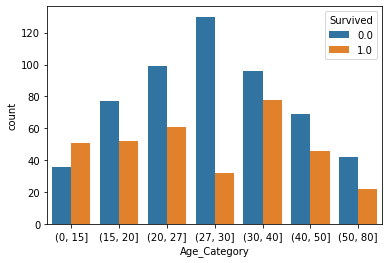

In [70]:
df['Age_Category'] = pd.cut(df['Age'], [0, 15, 20, 27, 30, 40, 50, 80])
sns.countplot(data=df, x='Age_Category', hue="Survived");

In [71]:
uniq_age_cat = list(df['Age_Category'].unique())

In [72]:
for name in uniq_age_cat:
    print('Total {} are {}, survival rate:'.format(name, len(df[(df['Age_Category']==name)  & (df['Survived'].notnull() == True)])))
    print(df[df['Age_Category'] == name]['Survived'].value_counts(normalize=True)*100)

Total (20, 27] are 160, survival rate:
0.0    61.875
1.0    38.125
Name: Survived, dtype: float64
Total (30, 40] are 174, survival rate:
0.0    55.172414
1.0    44.827586
Name: Survived, dtype: float64
Total (27, 30] are 162, survival rate:
0.0    80.246914
1.0    19.753086
Name: Survived, dtype: float64
Total (50, 80] are 64, survival rate:
0.0    65.625
1.0    34.375
Name: Survived, dtype: float64
Total (0, 15] are 87, survival rate:
1.0    58.62069
0.0    41.37931
Name: Survived, dtype: float64
Total (15, 20] are 129, survival rate:
0.0    59.689922
1.0    40.310078
Name: Survived, dtype: float64
Total (40, 50] are 115, survival rate:
0.0    60.0
1.0    40.0
Name: Survived, dtype: float64


In [73]:
uniq_age_cat

[Interval(20, 27, closed='right'),
 Interval(30, 40, closed='right'),
 Interval(27, 30, closed='right'),
 Interval(50, 80, closed='right'),
 Interval(0, 15, closed='right'),
 Interval(15, 20, closed='right'),
 Interval(40, 50, closed='right')]

In [74]:
sur_age_df = pd.DataFrame({
    "Survived":
    df[df['Survived'] == 1.0]['Age_Category'].value_counts(),
    "Total":
    df[df['Survived'].notnull()==True]['Age_Category'].value_counts(),
    "Rate, %":
    round(df[df['Survived'] == 1.0]['Age_Category'].value_counts()/\
    df[df['Survived'].notnull()==True]['Age_Category'].value_counts()\
    *100, 1)
})

In [75]:
sur_age_df.sort_values('Rate, %', ascending=False)

,Survived,Total,"Rate, %"
"(0, 15]",51,87,58.6
"(30, 40]",78,174,44.8
"(15, 20]",52,129,40.3
"(40, 50]",46,115,40.0
"(20, 27]",61,160,38.1
"(50, 80]",22,64,34.4
"(27, 30]",32,162,19.8


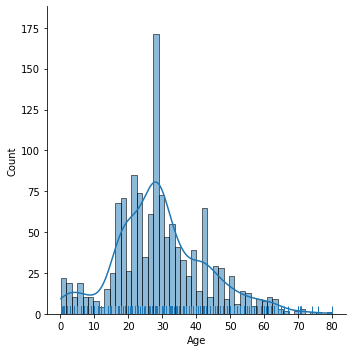

In [81]:
sns.displot(data=df,x='Age',bins=50, rug=True, kde=True);

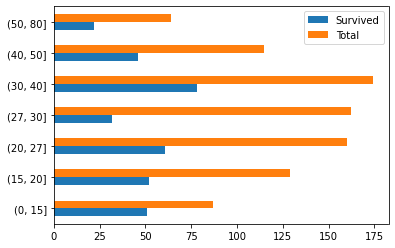

In [82]:
sur_age_df.drop('Rate, %', axis=1).plot.barh();

In [87]:
sur_age_df_15_27 = sur_age_df

In [88]:
sur_age_df_15_27.sort_values('Rate, %', ascending=False)

,Survived,Total,"Rate, %"
"(0, 15]",51,87,58.6
"(30, 40]",78,174,44.8
"(15, 20]",52,129,40.3
"(40, 50]",46,115,40.0
"(20, 27]",61,160,38.1
"(50, 80]",22,64,34.4
"(27, 30]",32,162,19.8


## Create a column with categories of ticket prices

In [89]:
# creating Fare_Category by cutting
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,8,17.5,40,600], labels=['Cheap','Mid.','Exp.','Very_Exp.'])

In [90]:
df['Fare_Category'].value_counts()

Mid.         378
Cheap        343
Exp.         317
Very_Exp.    271
Name: Fare_Category, dtype: int64

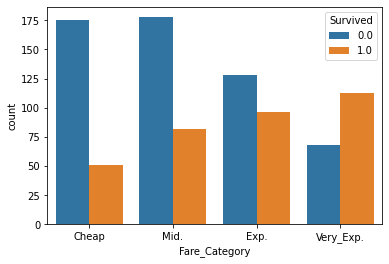

In [91]:
sns.countplot(data=df, x = 'Fare_Category', hue='Survived');

### Counclusion
#### From the graph we can conclude that there is some dependence of the number of survivors on the cost fare

In [92]:
df['Family'] = df['SibSp'] + df['Parch']

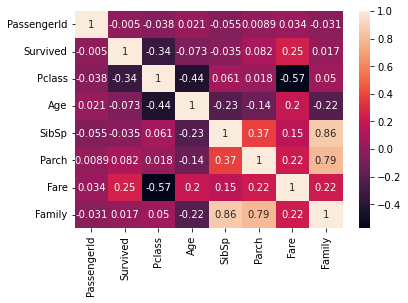

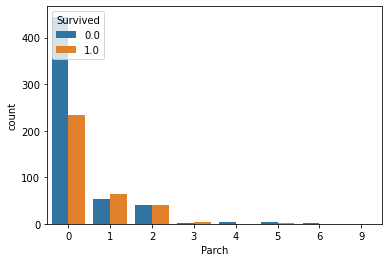

In [87]:
sns.countplot(data=df, x = 'Parch', hue='Survived');

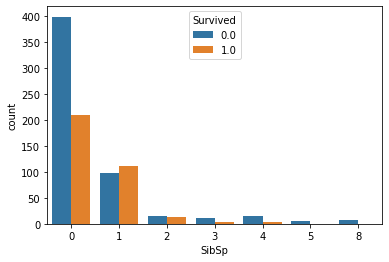

In [88]:
sns.countplot(data=df, x = 'SibSp', hue='Survived');

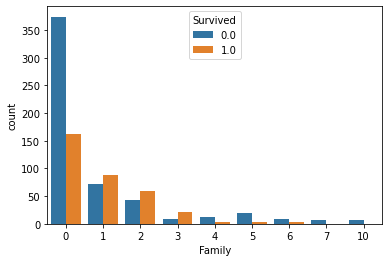

In [89]:
sns.countplot(data=df, x = 'Family', hue='Survived');

In [ ]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True);

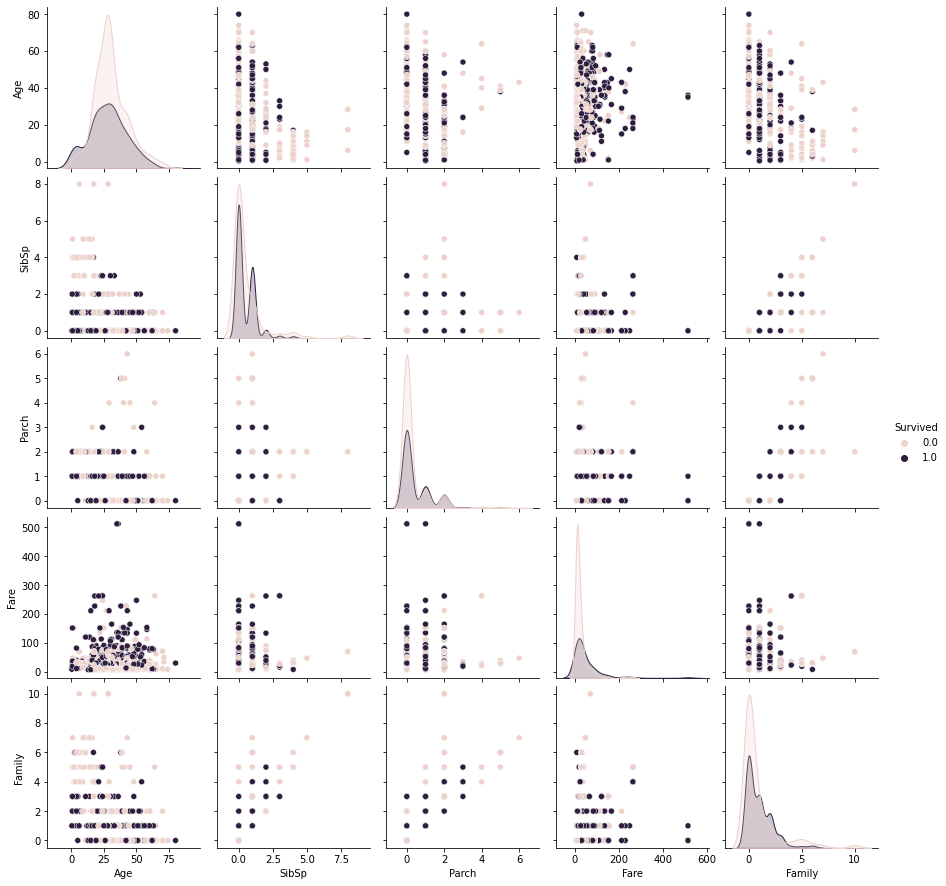

In [90]:
sns.pairplot(df[['Age','SibSp', 'Parch','Fare','Survived', 'Family']], hue='Survived');

In [159]:
clean_data = pd.get_dummies(df, drop_first=True)

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,aux_name,Age_Category,Fare_Category,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(20, 27]",Low,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(30, 40]",High,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(20, 27]",Low,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(30, 40]",High,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(30, 40]",Mid,0


In [161]:
# Data to be predicted
desired_col = clean_data[clean_data.Survived.isnull()]

In [162]:
desired_col = desired_col.drop(['Survived'], axis = 1)

In [96]:
df['Pclass'] = df['Pclass'].astype(str)

In [99]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [100]:
df = pd.get_dummies(df, drop_first=True)

In [102]:
# RAN THIS
desired_col = df[df['Survived'].isnull()]
desired_col = desired_col.drop(['Survived'], axis = 1)

In [103]:
desired_col

,PassengerId,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,...,aux_name_Mrs,"Age_Category_(15, 20]","Age_Category_(20, 27]","Age_Category_(27, 30]","Age_Category_(30, 40]","Age_Category_(40, 50]","Age_Category_(50, 80]",Fare_Category_Mid,Fare_Category_High_Mid,Fare_Category_High
891,892,34.50000,0,0,7.8292,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
892,893,47.00000,1,0,7.0000,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
893,894,62.00000,0,0,9.6875,0,1,0,1,1,...,0,0,0,0,0,0,1,1,0,0
894,895,27.00000,0,0,8.6625,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
895,896,22.00000,1,1,12.2875,2,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.31891,0,0,8.0500,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1305,1306,39.00000,0,0,108.9000,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1306,1307,38.50000,0,0,7.2500,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1307,1308,28.31891,0,0,8.0500,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [104]:
#Training data
tr_data = df
tr_data = tr_data.dropna()

In [106]:
tr_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,Sex_male,...,aux_name_Mrs,"Age_Category_(15, 20]","Age_Category_(20, 27]","Age_Category_(27, 30]","Age_Category_(30, 40]","Age_Category_(40, 50]","Age_Category_(50, 80]",Fare_Category_Mid,Fare_Category_High_Mid,Fare_Category_High
0,1,0.0,22.0,1,0,7.2500,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,2,1.0,38.0,1,0,71.2833,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,3,1.0,26.0,0,0,7.9250,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1.0,35.0,1,0,53.1000,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,35.0,0,0,8.0500,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [107]:
X = tr_data.drop('Survived', axis = 1)
y = tr_data['Survived']

In [108]:
y = y.astype('int64')

In [109]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
model = DecisionTreeClassifier()

In [114]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        51
           1       0.72      0.59      0.65        39

    accuracy                           0.72        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


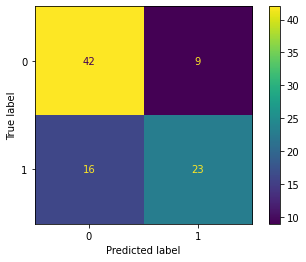

In [119]:
plot_confusion_matrix(model,X_test,y_test);

In [120]:
print("Accuracy: "+repr(round(model.score(X_test, y_pred) * 100, 2)) + "%")

Accuracy: 100.0%


In [127]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

The score for is: 56.68


Text(0.5, 1.05, 'Confusion_matrix for')

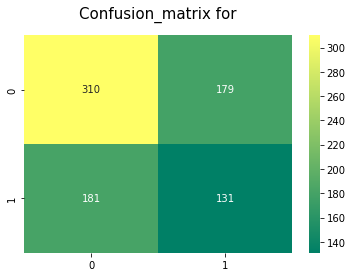

In [128]:
result_rf=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('The score for is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(model,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for', y=1.05, size=15)

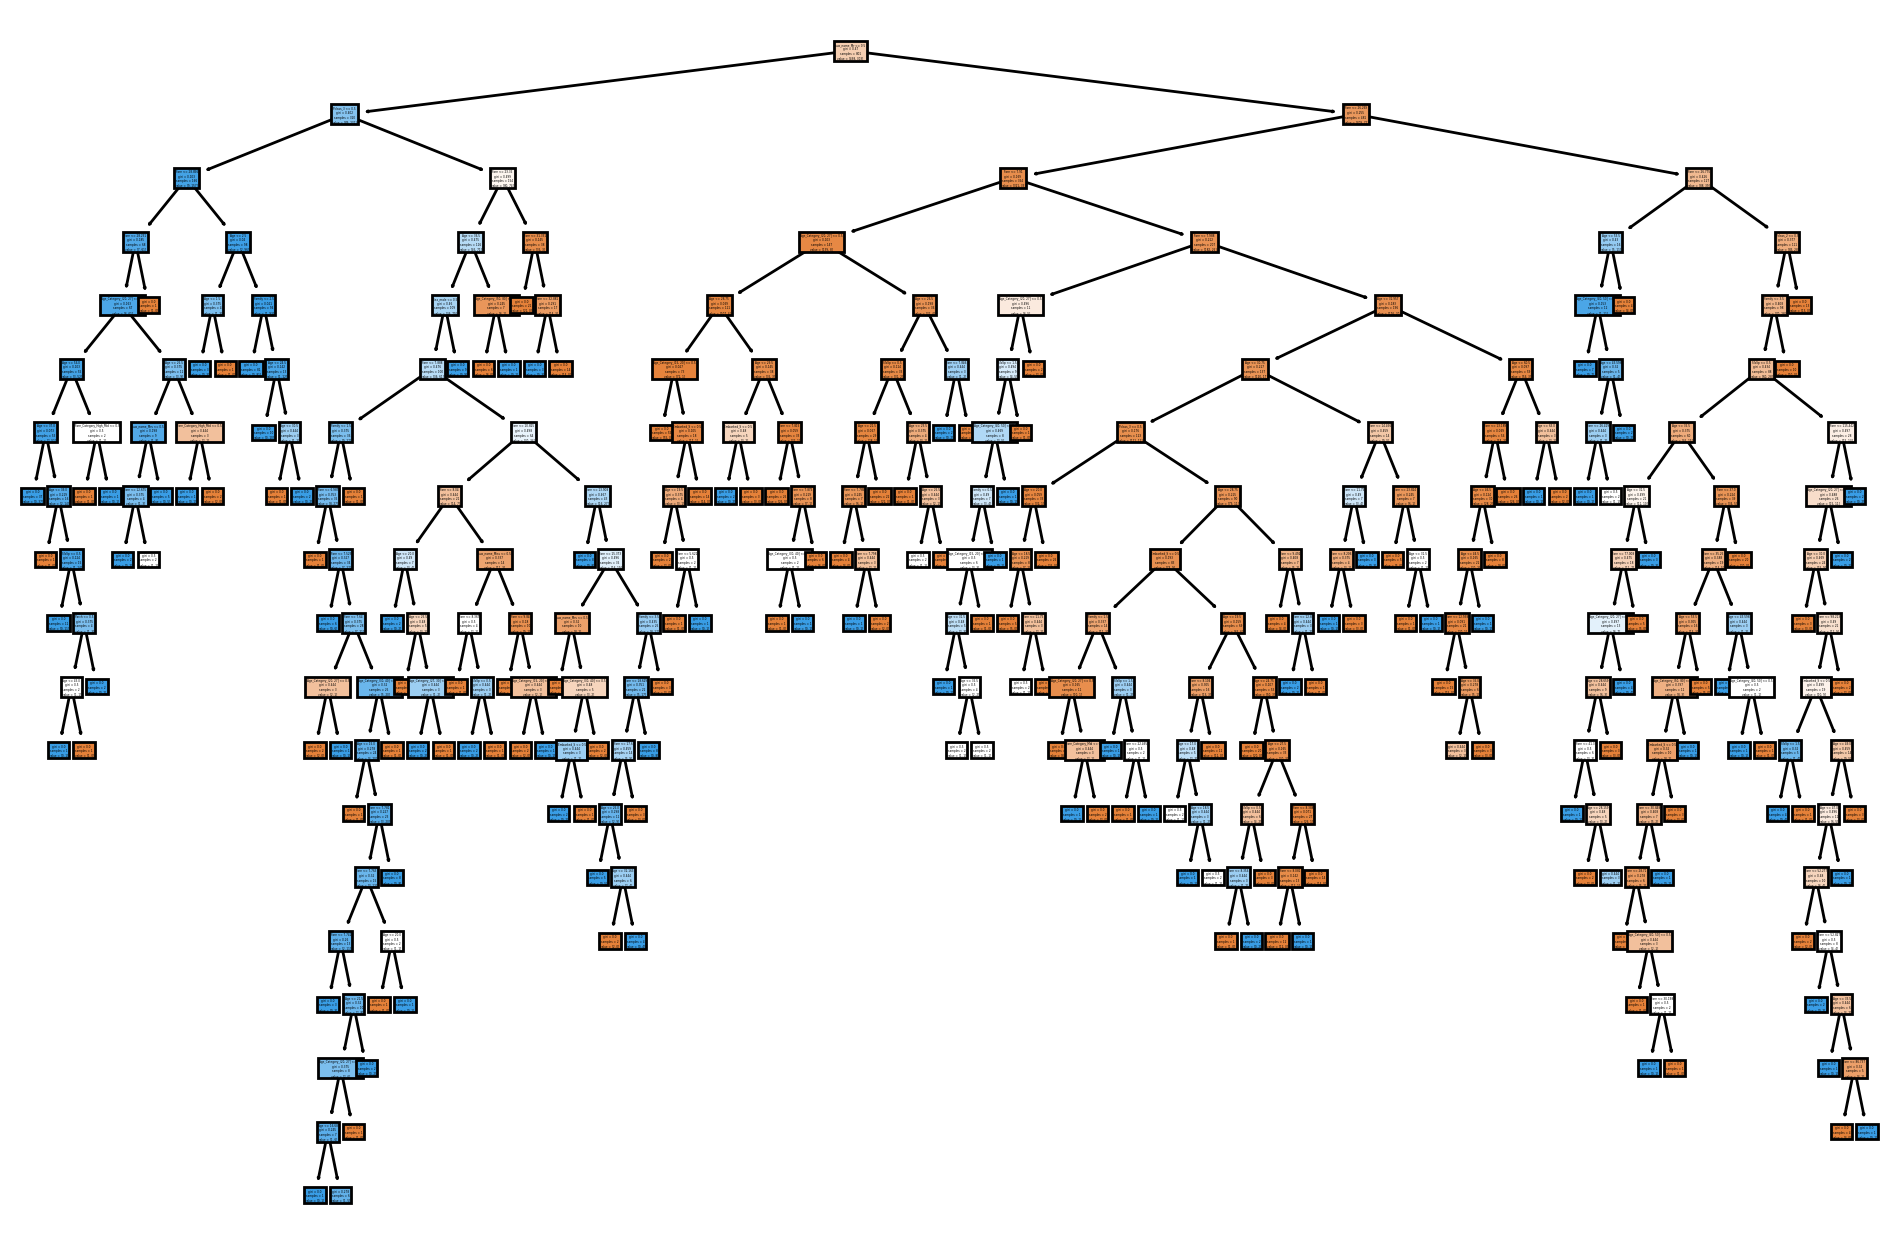

In [183]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model, feature_names=X.columns,filled=True);

In [184]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90





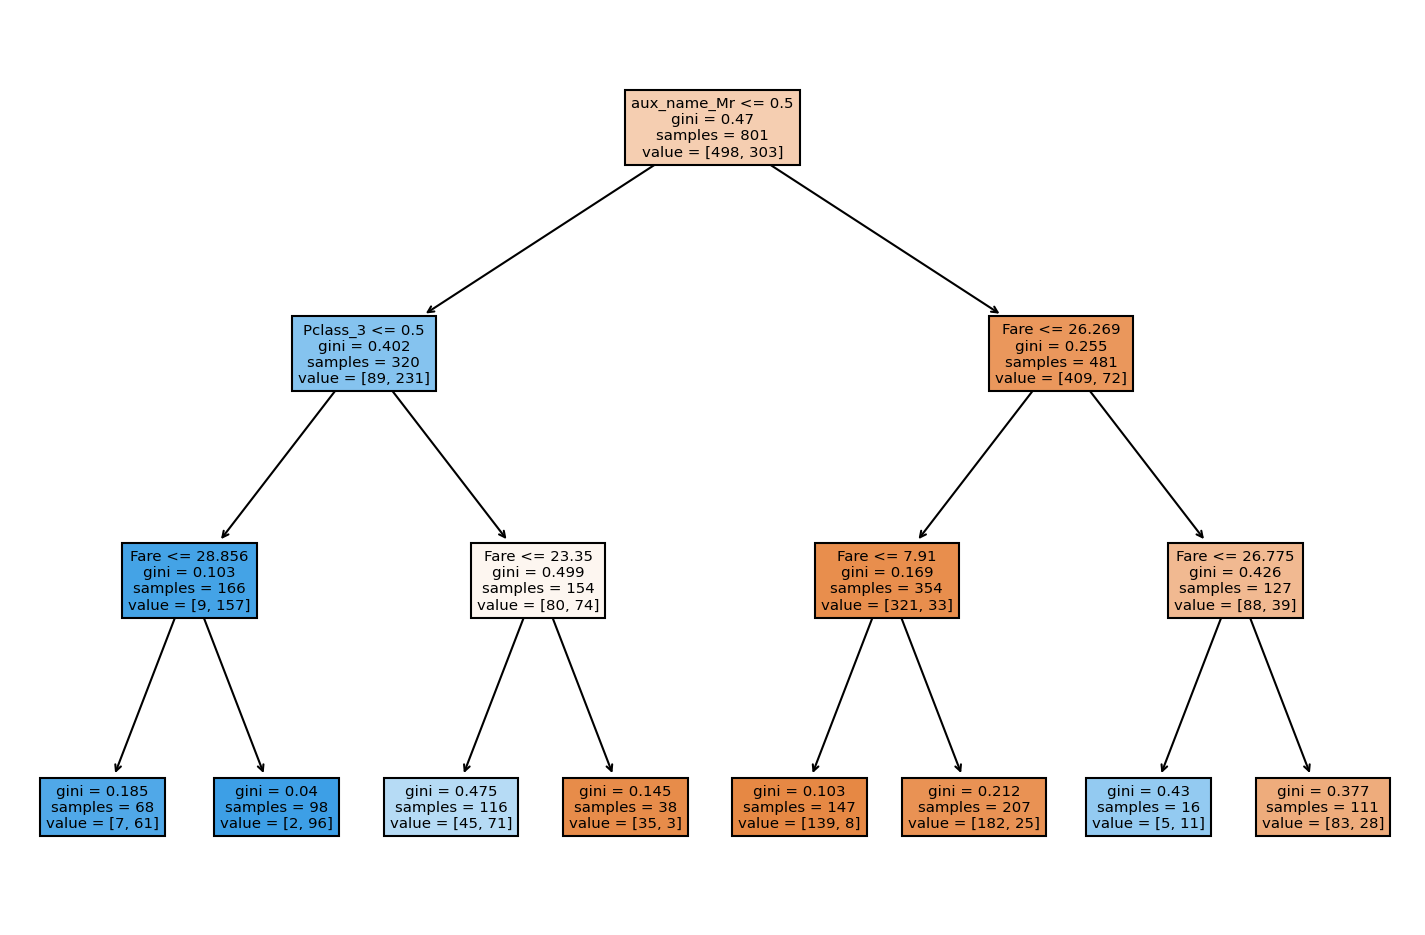

In [185]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        51
           1       0.86      0.62      0.72        39

    accuracy                           0.79        90
   macro avg       0.81      0.77      0.77        90
weighted avg       0.80      0.79      0.78        90





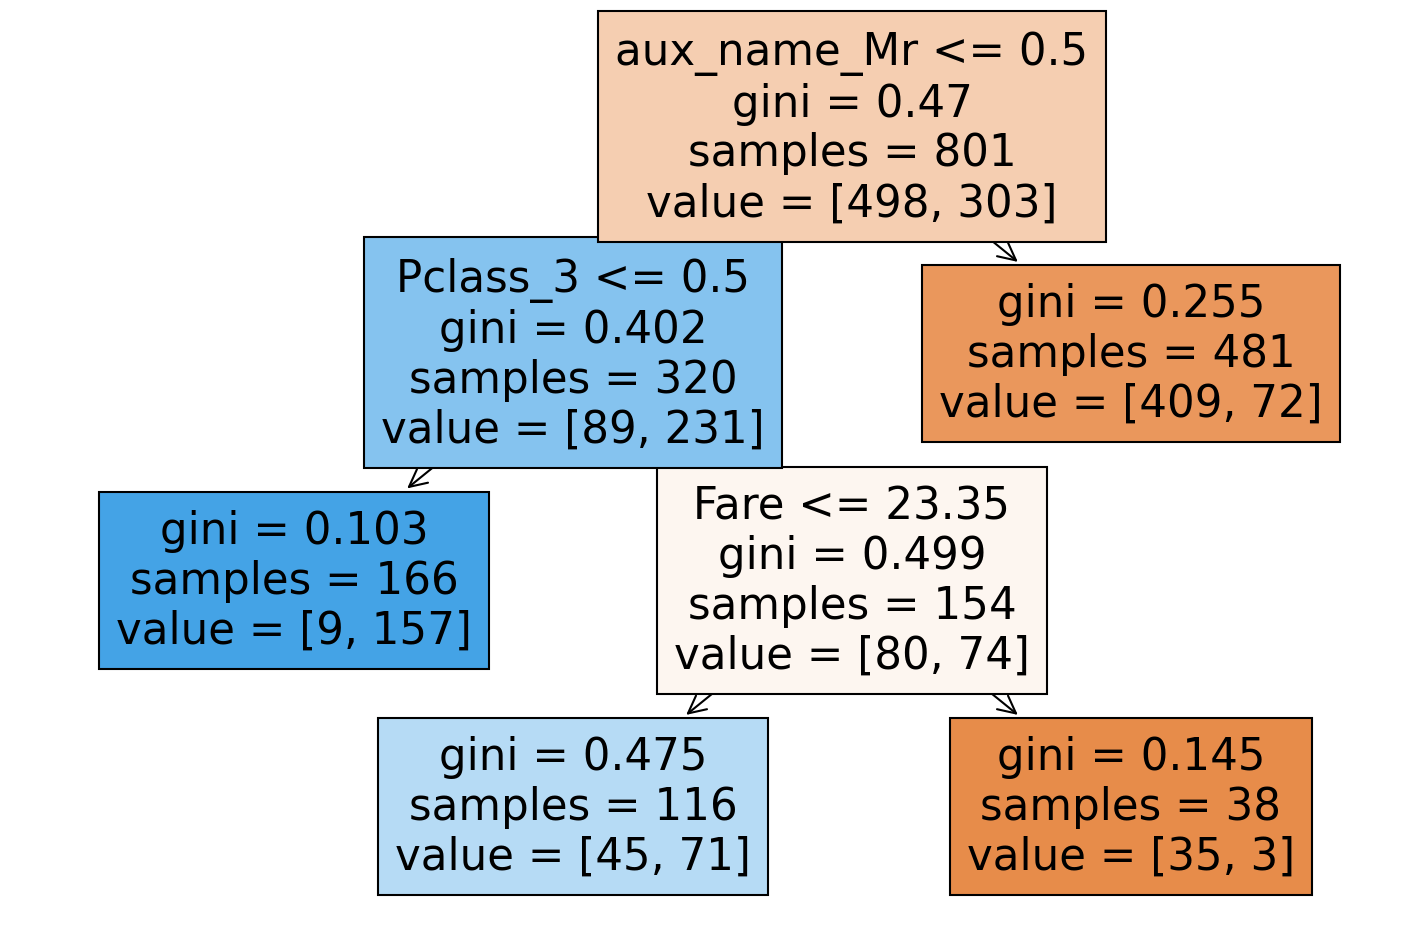

In [188]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=4)
max_leaf_tree.fit(X_train, y_train)
report_model(max_leaf_tree)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90





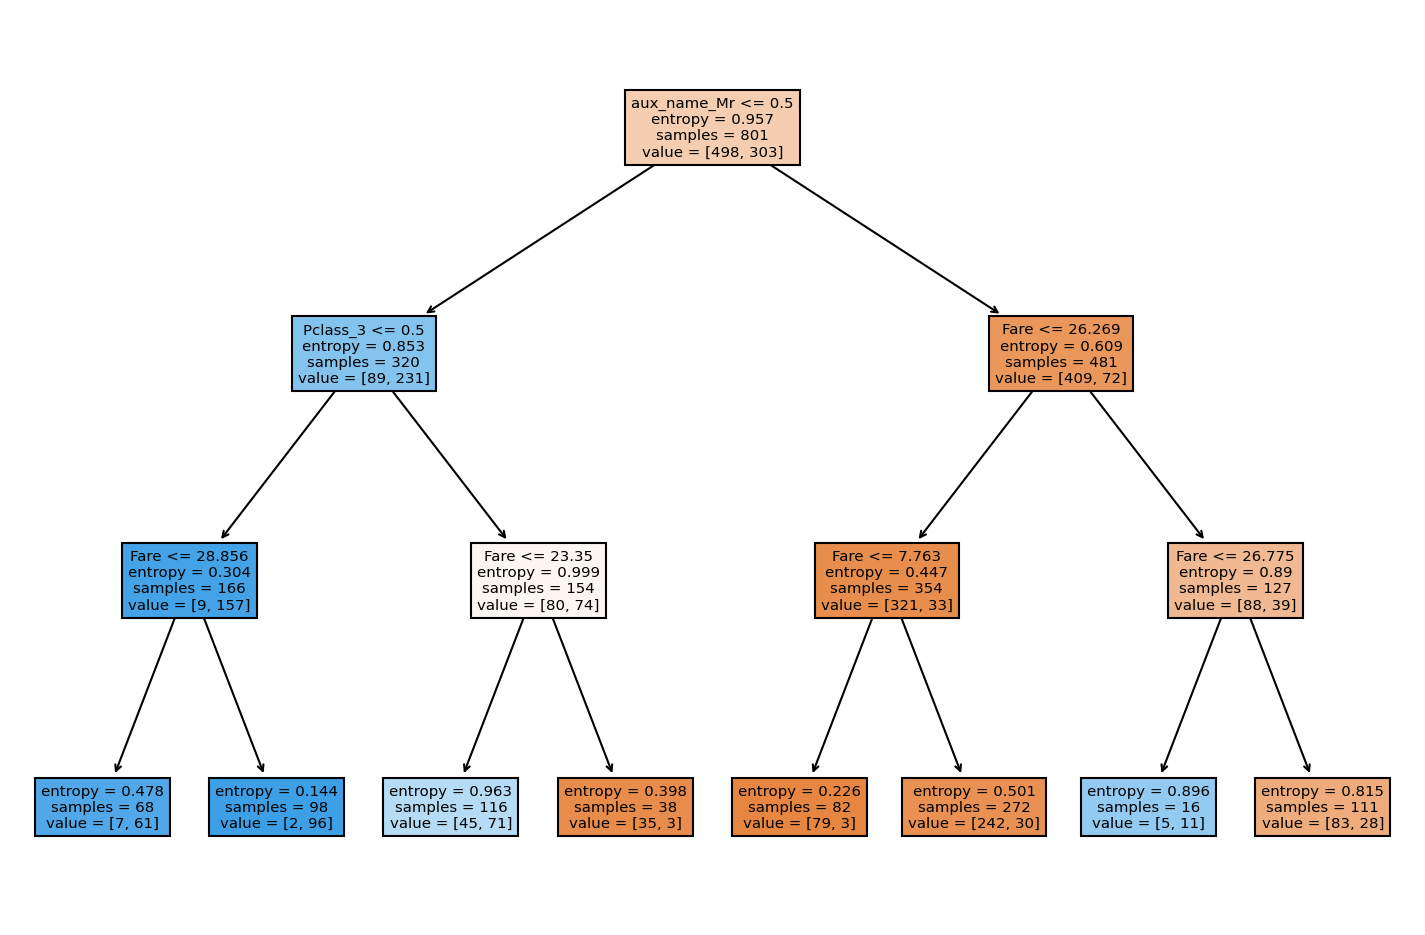

In [189]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
entropy_tree.fit(X_train,y_train)
report_model(entropy_tree)

In [346]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
rf = RandomForestClassifier(n_estimators=100)

In [348]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [349]:
preds = rf.predict(X_test)

In [350]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.87      0.69      0.77        39

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.83      0.82      0.82        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


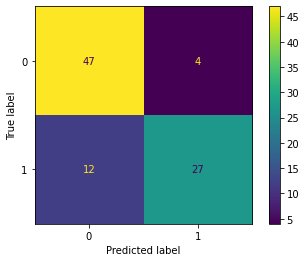

In [351]:
plot_confusion_matrix(rf,X_test,y_test)

In [271]:
print("Ada Accuracy: "+repr(round(rf.score(X_test, y_test) * 100, 2)) + "%")

Ada Accuracy: 82.22%


The score for is: 80.78


Text(0.5, 1.05, 'Confusion_matrix for')

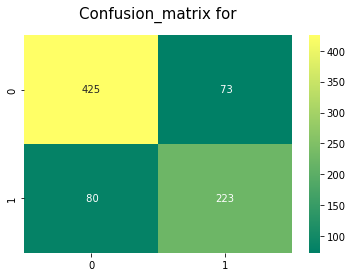

In [352]:
result_rf=cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy')
print('The score for is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(rf,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for', y=1.05, size=15)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        51
           1       0.88      0.74      0.81        39

    accuracy                           0.84        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.85      0.84      0.84        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


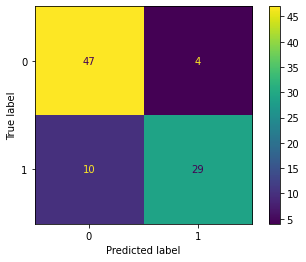

In [266]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)
print(classification_report(y_test,ada_preds))
plot_confusion_matrix(ada_model,X_test,y_test)

In [278]:
print("AdaBoost Accuracy: "+repr(round(ada_model.score(X_test, y_test) * 100, 2)) + "%")

AdaBoost Accuracy: 84.44%


The cross validated score for AdaBoost is: 81.65


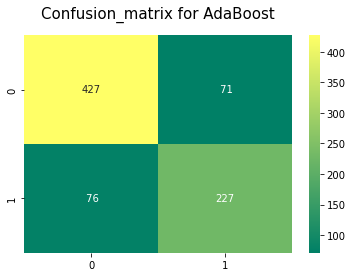

In [279]:
result_rf=cross_val_score(ada_model,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(ada_model,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for AdaBoost', y=1.05, size=15);

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


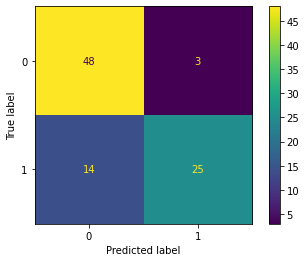

In [197]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
gb_preds = gb_model.predict(X_test)
print(classification_report(y_test,gb_preds))
plot_confusion_matrix(gb_model,X_test,y_test)

In [198]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [199]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,ada_preds)
    
    error_rates.append(err)

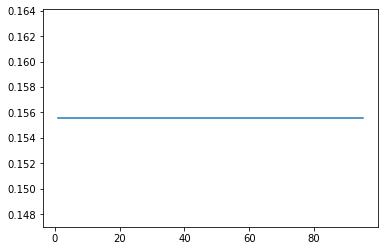

In [200]:
plt.plot(range(1,96),error_rates);

In [201]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [202]:
imp_feats = feats[feats['Importance']>0]

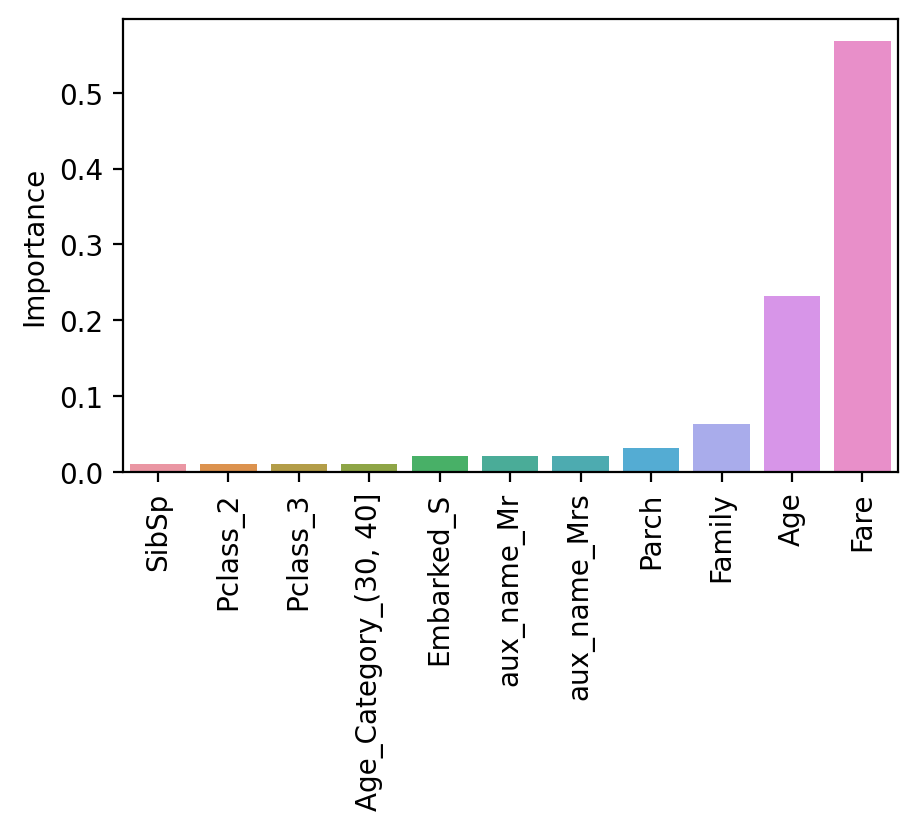

In [203]:
plt.figure(figsize=(5,3),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [204]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {"n_estimators":[1,5,10,20,40,100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth':[3,4,5]}

In [206]:
gb_model = GradientBoostingClassifier()

In [207]:
grid = GridSearchCV(gb_model,param_grid)

In [208]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


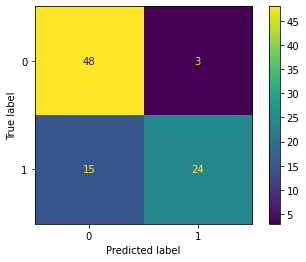

In [209]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))
plot_confusion_matrix(grid,X_test,y_test)

In [210]:
feat_import = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]
imp_feats.sort_values('Importance')

,Importance
"Age_Category_(27, 30]",0.000840
Sex_male,0.001349
"Age_Category_(20, 27]",0.002154
Parch,0.002339
"Age_Category_(30, 40]",0.002616
"Age_Category_(40, 50]",0.004997
Pclass_2,0.005401
Age,0.016108
Family,0.019935
Fare,0.146144


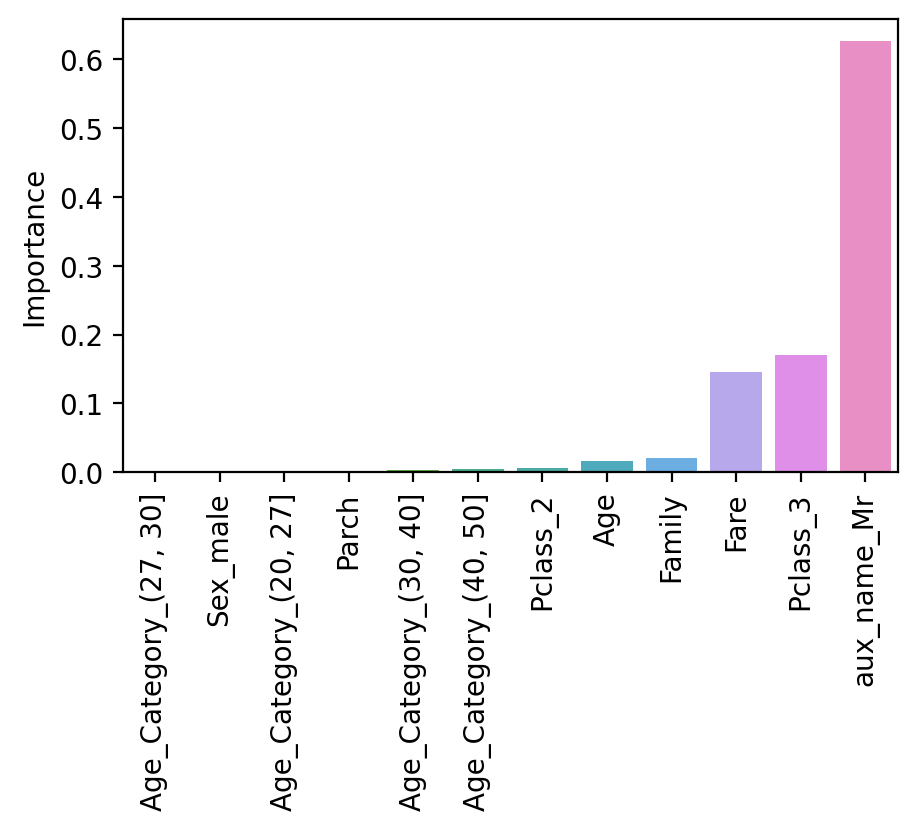

In [211]:
plt.figure(figsize=(5,3),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

## Log reg

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [217]:
scaler = StandardScaler()

In [218]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [220]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000, C=4, l1_ratio=0.0, penalty='elasticnet')

In [221]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=4, l1_ratio=0.0, max_iter=5000, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

In [222]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty': penalty,
             'l1_ratio': l1_ratio,
             'C': C}

In [223]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [224]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\79852\anaconda3\lib\site-packag

GridSearchCV(estimator=LogisticRegression(C=4, l1_ratio=0.0, max_iter=5000,
                                          multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.951...33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [225]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.2631578947368421, 'penalty': 'elasticnet'}

In [226]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [227]:
y_pred = log_model.predict(scaled_X_test)

In [228]:
y_pred = grid_model.predict(scaled_X_test)

In [229]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [230]:
y_test.shape

(90,)

In [231]:
y_pred.shape

(90,)

In [232]:
scaled_X_train
accuracy_score(y_test,y_pred)

0.8333333333333334

In [233]:
confusion_matrix(y_test,y_pred)

array([[49,  2],
       [13, 26]], dtype=int64)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


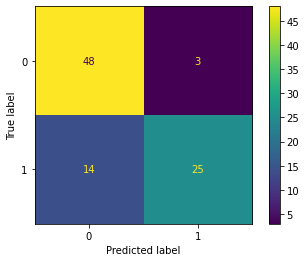

In [234]:
plot_confusion_matrix(log_model,scaled_X_test,y_test);

In [235]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90



In [236]:
log_model.get_params()

{'C': 4,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.0,
 'max_iter': 5000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [283]:
print("Log Regr Accuracy: "+repr(round(log_model.score(scaled_X_test, y_test) * 100, 2)) + "%")

Log Regr Accuracy: 81.11%


In [238]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

The cross validated score for LOG REGR is: 83.27


Text(0.5, 1.05, 'Confusion_matrix for LOG REGR')

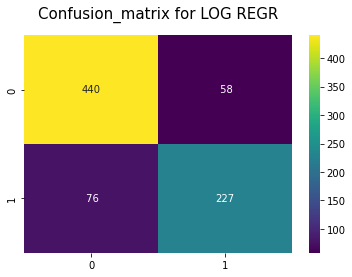

In [284]:
result_rf=cross_val_score(log_model,scaled_X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for LOG REGR is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(log_model,scaled_X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="viridis")
plt.title('Confusion_matrix for LOG REGR', y=1.05, size=15)

In [285]:
log_model.coef_

array([[-0.51896567, -0.36846002, -0.14888937,  0.0095757 , -0.32523715,
        -0.44696829, -1.14171899,  0.02559552, -0.06835976, -0.12867646,
        -0.17166403, -1.668127  ,  0.16359313, -0.11592422, -0.08251838,
        -0.15246289,  0.14625305, -0.05401964,  0.05024169, -0.18660147,
        -0.08835827,  0.03696314]])

In [286]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

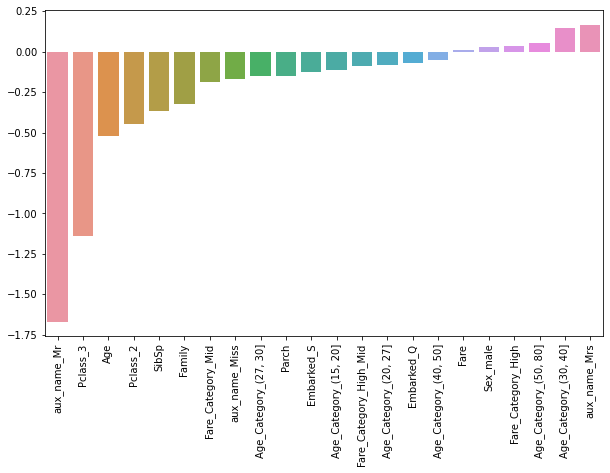

In [287]:
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


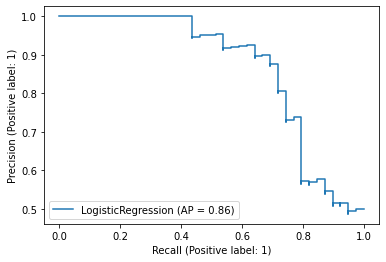

In [288]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(log_model,scaled_X_test,y_test);

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


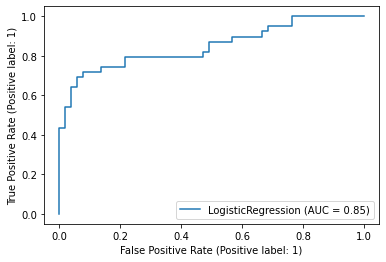

In [289]:
plot_roc_curve(log_model,scaled_X_test,y_test);

## Support vector classifier

In [245]:
from sklearn.svm import SVC

In [246]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [247]:
svc = SVC(class_weight='balanced')

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'verbose':[3]}

In [250]:
grid = GridSearchCV(svc,param_grid)

In [251]:
grid.fit(scaled_X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly'], 'verbose': [3]})

In [252]:
grid.best_params_

{'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'verbose': 3}

In [253]:
grid_pred = grid.predict(scaled_X_test)

In [254]:
confusion_matrix(y_test,grid_pred)

array([[48,  3],
       [14, 25]], dtype=int64)

In [255]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [256]:
svc = SVC(class_weight='balanced', C=0.5, degree=3, gamma='scale', kernel='poly')

In [257]:
svc.fit(scaled_X_train,y_train)

SVC(C=0.5, class_weight='balanced', kernel='poly')

In [258]:
y_pred = svc.predict(scaled_X_test)

In [259]:
print("SVC Accuracy: "+repr(round(svc.score(scaled_X_test, y_test) * 100, 2)) + "%")

SVC Accuracy: 81.11%


The cross validated score for SVC is: 83.52


Text(0.5, 1.05, 'Confusion_matrix for SVC')

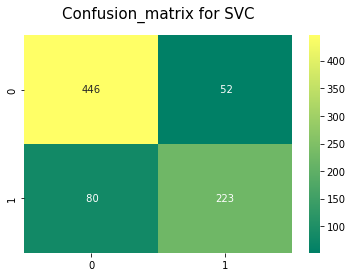

In [290]:
result_rf=cross_val_score(svc,scaled_X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for SVC is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(svc,scaled_X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for SVC', y=1.05, size=15)

In [291]:
from sklearn.metrics import precision_score, recall_score

In [294]:
precision_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [90, 801]

In [183]:
print(len(y_test), len(y_pred))


179 712


In [173]:
recall_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [179, 712]

In [174]:
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [179, 712]

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [299]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [300]:
preds = model.predict(X_test)

In [301]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [302]:
confusion_matrix(y_test,preds)

array([[46,  5],
       [14, 25]], dtype=int64)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


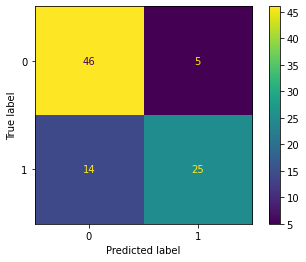

In [303]:
plot_confusion_matrix(model,X_test,y_test)

In [304]:
model.feature_importances_

array([0.19100535, 0.03142211, 0.02687788, 0.21149037, 0.04437425,
       0.02072025, 0.04904175, 0.07137665, 0.0077297 , 0.02104831,
       0.03385474, 0.1441242 , 0.03614026, 0.0094428 , 0.01791926,
       0.01184108, 0.01564344, 0.00921273, 0.00398345, 0.01613162,
       0.01149524, 0.01512457])

In [305]:
test_error = []

for n in range(1,40):
    # Используем n случайных деревьев
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

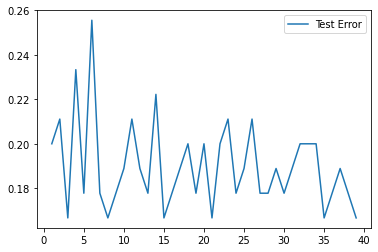

In [306]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [309]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # oob_score имеет смысл только при bootstrap=True!

In [310]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [311]:
grid.fit(X_train,y_train)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79852\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79852\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [312]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [313]:
predictions = grid.predict(X_test)

In [314]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


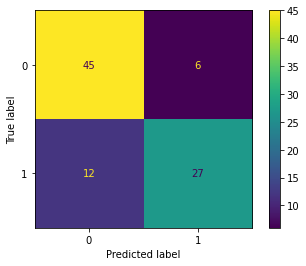

In [315]:
plot_confusion_matrix(grid,X_test,y_test)

In [316]:
grid.best_estimator_.oob_score

True

In [317]:
# С нижним подчёркиванием в конце - получаем значение метрики oob_score, вычисленное при обучении модели
grid.best_estimator_.oob_score_

0.818976279650437

In [318]:
from sklearn.metrics import accuracy_score

In [319]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # Более подробно об этой строке кода см. в видео-лекции!!
    errors.append(err)
    misclassifications.append(n_missed)

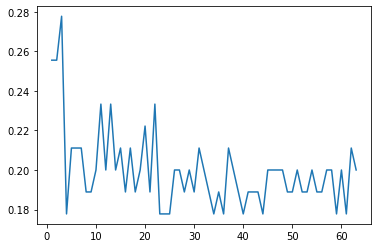

In [320]:
plt.plot(range(1,64),errors)

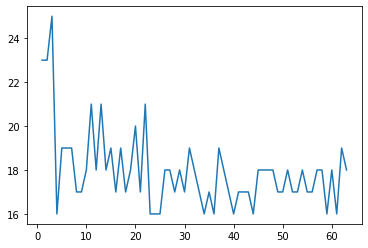

In [321]:
plt.plot(range(1,64),misclassifications)

In [122]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [123]:
from sklearn.model_selection import GridSearchCV
n_estimators=[500, 700, 900]
min_samples_split=[5,10,15]
min_samples_leaf=[1,2,3]

In [124]:
param_grid = {'n_estimators':n_estimators,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(criterion='entropy', 
                             max_features='auto',
                             oob_score=True,
                             bootstrap=True,
                             random_state=1,
                             n_jobs=-1)
grid = GridSearchCV(rfc,param_grid)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', n_jobs=-1,
                                              oob_score=True, random_state=1),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [500, 700, 900]})

In [133]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

RF Accuracy: 87.78%
The cross validated score for Random forest is: 82.65


Text(0.5, 1.05, 'Confusion_matrix for RF')

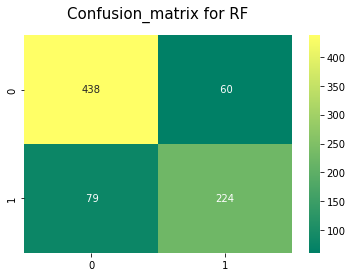

In [134]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=500,
                             min_samples_split=5,
                             min_samples_leaf=1,
                             max_features='auto',
                             class_weight="balanced",
                             oob_score=True,
                             bootstrap=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf.fit(x_train,  y_train)
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [380]:
500-10RF Accuracy: 88.27%
The cross validated score for Random forest is: 83.99
100-5 RF Accuracy: 84.36%
The cross validated score for Random forest is: 83.0
500-5 RF Accuracy: 88.27%
The cross validated score for Random forest is: 82.31
500-10 RF Accuracy: 81.01%
The cross validated score for Random forest is: 85.4
500-15 RF Accuracy: 83.8%
The cross validated score for Random forest is: 84.0
800-15 RF Accuracy: 78.77%
The cross validated score for Random forest is: 85.24

SyntaxError: invalid syntax (1166167522.py, line 1)

In [138]:
result = clf.predict(desired_col)
submission = pd.DataFrame({'PassengerId':desired_col['PassengerId'],'Survived':result})
submission['Survived'] = submission['Survived'].astype(int)
print(submission.shape)
filename = 'titanic_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: titanic_preds.csv


In [137]:
submission

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
